<a href="https://colab.research.google.com/github/StoneMason495/cap-comp215/blob/main/Project1_6DegreesofBacon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 1: 6 Degrees of Kevin Bacon**
####Name: Zach Mason

In [2]:
import json, requests
import matplotlib.pyplot as plt
from pprint import pprint
import networkx as nx
from dataclasses import dataclass

In [3]:
API_KEY = 'k_ynffhhna'

title = 'lexx'
url = f"https://imdb-api.com/en/API/Top250Movies/{API_KEY}"

response = requests.request("GET", url, headers={}, data={})

data = json.loads(response.text)  # recall json.loads for lab 1

results = data['items']
# pprint(results)

In [4]:
pprint(results)

[{'crew': 'Frank Darabont (dir.), Tim Robbins, Morgan Freeman',
  'fullTitle': 'The Shawshank Redemption (1994)',
  'id': 'tt0111161',
  'imDbRating': '9.2',
  'imDbRatingCount': '2701903',
  'image': 'https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_Ratio0.6716_AL_.jpg',
  'rank': '1',
  'title': 'The Shawshank Redemption',
  'year': '1994'},
 {'crew': 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino',
  'fullTitle': 'The Godfather (1972)',
  'id': 'tt0068646',
  'imDbRating': '9.2',
  'imDbRatingCount': '1875784',
  'image': 'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_Ratio0.7015_AL_.jpg',
  'rank': '2',
  'title': 'The Godfather',
  'year': '1972'},
 {'crew': 'Christopher Nolan (dir.), Christian Bale, Heath Ledger',
  'fullTitle': 'The Dark Knight (2008)',
  'id': 'tt0468569',
  'imDbRating': '9.0',
  'imDbRatingCount': '2675689'

In [5]:
results = [item for item in results if int(item['imDbRatingCount']) >= 1250000]
print(len(results))
all(int(item['imDbRatingCount'])>=1250000 for item in results)

30


True

The above code is the filter, as there is not enough computing power for us to do all 250 movies in this simulation, so the list has been narrowed down to the number of movies with over 1.25 million IMDb reviews, which is exactly 30 movies

In [6]:
def getfullcrew(film_id):
  API_KEY = 'k_ynffhhna'
  url = f'https://imdb-api.com/en/API/FullCast/{API_KEY}/{film_id}'
  response = requests.request("GET", url, headers={}, data={})
  data = json.loads(response.text)
  return data['actors']

@dataclass
class Movie:
  crew: str
  fullTitle: str
  id: str
  imDbRating: str
  imDbRatingCount: str
  image: str
  rank: str
  title: str
  year: str

  def __str__(self):
    return f'{self.fullTitle}: \n{self.imDbRating}/10 on {self.imDbRatingCount} reviews. \n{self.crew}'
    
  @classmethod
  def build_movie(cls, input_data, **kwargs):
    crew = input_data['crew']
    fullTitle = input_data['fullTitle']
    id = input_data['id']
    imDbRating = input_data['imDbRating']
    imDbRatingCount = input_data['imDbRatingCount']
    image = input_data['image']
    rank = input_data['rank']
    title = input_data['title']
    year = input_data['year']
    return Movie(crew, fullTitle, id, imDbRating, imDbRatingCount, image, rank, title, year)

@dataclass
class Actor:
  id : str
  image : str
  name : str
  asCharacter : str
  def __str__(self):
    return f'{self.name} played {self.asCharacter}'
  @classmethod
  def build_actor(cls, input_data, **kwargs):
    id = input_data['id']
    image = input_data['image']
    name = input_data['name']
    asCharacter = input_data['asCharacter']
    return Actor(id, image, name, asCharacter)


# test instance of creating a movie object, getting the full crew, and creating two actor classes in this case for "The Godfather"
test_film = Movie.build_movie(results[1])
print(test_film)

test_full_crew = getfullcrew(test_film.id)
test_full_crew

uncredited = Actor.build_actor(test_full_crew[len(test_full_crew)-1])

al_pacino = Actor.build_actor(test_full_crew[1])
print(al_pacino, ',', uncredited)

The Godfather (1972): 
9.2/10 on 1875784 reviews. 
Francis Ford Coppola (dir.), Marlon Brando, Al Pacino
Al Pacino played Michael Corleone , Conrad Yama played Fruit Vendor (uncredited)


In [7]:
G = nx.Graph()
for i in range(len(test_full_crew)):
  G.add_node(test_full_crew[i]['name'])
list(G.nodes())

['Marlon Brando',
 'Al Pacino',
 'James Caan',
 'Richard S. Castellano',
 'Robert Duvall',
 'Sterling Hayden',
 'John Marley',
 'Richard Conte',
 'Al Lettieri',
 'Diane Keaton',
 'Abe Vigoda',
 'Talia Shire',
 'Gianni Russo',
 'John Cazale',
 'Rudy Bond',
 'Al Martino',
 'Morgana King',
 'Lenny Montana',
 'John Martino',
 'Salvatore Corsitto',
 'Richard Bright',
 'Alex Rocco',
 'Tony Giorgio',
 'Vito Scotti',
 'Tere Livrano',
 'Victor Rendina',
 'Jeannie Linero',
 'Julie Gregg',
 'Ardell Sheridan',
 'Simonetta Stefanelli',
 'Angelo Infanti',
 'Corrado Gaipa',
 'Franco Citti',
 'Saro Urzì',
 'Frank Albanese',
 'Chris Anastasio',
 'Norm Bacchiocchi',
 'Max Brandt',
 'Tybee Brascia',
 'Garrett Cassell',
 'Carmine Coppola',
 'Gian-Carlo Coppola',
 'Italia Coppola',
 'Roman Coppola',
 'Sofia Coppola',
 'Don Costello',
 'Robert Dahdah',
 'Richard Fass',
 'Gray Frederickson',
 'Ron Gilbert',
 'Anthony Gounaris',
 'Joe Lo Grippo',
 'Sonny Grosso',
 'Louis Guss',
 'Bobra Harris',
 'Merril E. Jo

In [31]:
# for i in range(len(list(G.nodes()))):
#   G.add_edge(list(G.nodes)[i-1], list(G.nodes)[i])
# list(G.edges())

for i in list(G.nodes()):
  for j in list(G.nodes()):
    if i != j  and (i,j) or (j,i) not in list(G.edges):
      G.add_edge(i,j)
assert ('Conrad Yama', 'Marlon Brando') not in list(G.edges())
tes = 'Talia Shire'
ting = 'Talia Shire'
print(tes == ting, tes is ting)
list(G.edges())

True False


[('Marlon Brando', 'Conrad Yama'),
 ('Marlon Brando', 'Al Pacino'),
 ('Marlon Brando', 'James Caan'),
 ('Marlon Brando', 'Richard S. Castellano'),
 ('Marlon Brando', 'Robert Duvall'),
 ('Marlon Brando', 'Sterling Hayden'),
 ('Marlon Brando', 'John Marley'),
 ('Marlon Brando', 'Richard Conte'),
 ('Marlon Brando', 'Al Lettieri'),
 ('Marlon Brando', 'Diane Keaton'),
 ('Marlon Brando', 'Abe Vigoda'),
 ('Marlon Brando', 'Talia Shire'),
 ('Marlon Brando', 'Gianni Russo'),
 ('Marlon Brando', 'John Cazale'),
 ('Marlon Brando', 'Rudy Bond'),
 ('Marlon Brando', 'Al Martino'),
 ('Marlon Brando', 'Morgana King'),
 ('Marlon Brando', 'Lenny Montana'),
 ('Marlon Brando', 'John Martino'),
 ('Marlon Brando', 'Salvatore Corsitto'),
 ('Marlon Brando', 'Richard Bright'),
 ('Marlon Brando', 'Alex Rocco'),
 ('Marlon Brando', 'Tony Giorgio'),
 ('Marlon Brando', 'Vito Scotti'),
 ('Marlon Brando', 'Tere Livrano'),
 ('Marlon Brando', 'Victor Rendina'),
 ('Marlon Brando', 'Jeannie Linero'),
 ('Marlon Brando', 'J

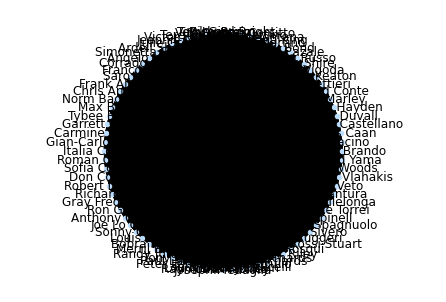

In [14]:
nx.draw_circular(G,
                 node_color='#bbddff',
                 node_size=20,
                 with_labels=True)
plt.axis('equal')
plt.show()